In [51]:
import pandas as pd #type: ignore
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore
import seaborn as sns #type: ignore
import os
import json
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_json('../TransfromedData/transformed_products_units.json')

In [3]:
df.head()

,2023-04-02,2023-04-03,2023-04-04,2023-04-05,2023-04-06,2023-04-07,2023-04-08,2023-04-09,2023-04-10,2023-04-11,2023-04-12,2023-04-13,2023-04-14,2023-04-15,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-04-29,2023-04-30,2023-05-01,2023-05-02,2023-05-03,2023-05-04,2023-05-05,2023-05-06,2023-05-07,2023-05-08,2023-05-09,2023-05-10,2023-05-11,2023-05-12,2023-05-13,2023-05-14,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,2023-05-20,2023-05-21,2023-05-22,2023-05-23,2023-05-24,2023-05-25,2023-05-26,2023-05-27,2023-05-28,2023-05-29,2023-05-30,2023-05-31,2023-06-01,2023-06-02,2023-06-03,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,2023-06-11,2023-06-12,2023-06-13,2023-06-14,2023-06-15,2023-06-16,2023-06-17,2023-06-18,2023-06-19,2023-06-20,2023-06-21,2023-06-22,2023-06-23,2023-06-24,2023-06-25,2023-06-26,2023-06-27,2023-06-28,2023-06-29,2023-06-30,2023-07-01,2023-07-02,2023-07-03,2023-07-04,2023-07-05,2023-07-06,2023-07-07,2023-07-08,2023-07-09,2023-07-10,2023-07-11,2023-07-12,2023-07-13,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23,2023-07-24,2023-07-25,2023-07-26,2023-07-27,2023-07-28,2023-07-29,2023-07-30,2023-07-31,2023-08-01,2023-08-02,2023-08-03,2023-08-04,2023-08-05,2023-08-06,2023-08-07,2023-08-08,2023-08-09,2023-08-10,2023-08-11,2023-08-12,2023-08-13,2023-08-14,2023-08-15,2023-08-16,2023-08-17,2023-08-18,2023-08-19,2023-08-20,2023-08-21,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-26,2023-08-27,2023-08-28,2023-08-29,2023-08-30,2023-08-31,2023-09-01,2023-09-02,2023-09-03,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-08,2023-09-09,2023-09-10,2023-09-11,2023-09-12,2023-09-13,2023-09-14,2023-09-15,2023-09-16,2023-09-17,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-23,2023-09-24,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29,2023-09-30,2023-10-01,2023-10-02,2023-10-03,2023-10-04,2023-10-05,2023-10-06,2023-10-07,2023-10-08,2023-10-09,2023-10-10,2023-10-11,2023-10-12,2023-10-13,2023-10-14,2023-10-15,2023-10-16,2023-10-17,2023-10-18,2023-10-19,2023-10-20,2023-10-21,2023-10-22,2023-10-23,2023-10-24,2023-10-25,2023-10-26,2023-10-27,2023-10-28,2023-10-29,2023-10-30,2023-10-31,2023-11-01,2023-11-02,2023-11-03,2023-11-04,2023-11-05,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-11,2023-11-12,2023-11-13,2023-11-14,2023-11-15,2023-11-16,2023-11-17,2023-11-18,2023-11-19,2023-11-20,2023-11-21,2023-11-22,2023-11-23,2023-11-24,2023-11-25,2023-11-26,2023-11-27,2023-11-28,2023-11-29,2023-11-30,2023-12-01,2023-12-02,2023-12-03,2023-12-04,2023-12-05,2023-12-06,2023-12-07,2023-12-08,2023-12-09,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,2023-12-17,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31,2024-01-01,2024-01-02,2024-01-03,2024-01-04,2024-01-05,2024-01-06,2024-01-07,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-13,2024-01-14,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-20,2024-01-21,2024-01-22,2024-01-23,2024-01-24,2024-01-25,2024-01-26,2024-01-27,2024-01-28,2024-01-29,2024-01-30,2024-01-31,2024-02-01,2024-02-02,2024-02-03,2024-02-04,2024-02-05,2024-02-06,2024-02-07,2024-02-08,2024-02-09,2024-02-10,2024-02-11,2024-02-12,2024-02-13,2024-02-14,2024-02-15,2024-02-16,2024-02-17,2024-02-18,2024-02-19,2024-02-20,2024-02-21,2024-02-22,2024-02-23,2024-02-24,2024-02-25,2024-02-26,2024-02-27,2024-02-28,2024-02-29,2024-03-01,2024-03-02,2024-03-03,2024-03-04,2024-03-05,2024-03-06,2024-03-07,2024-03-08,2024-03-09,2024-03-10,2024-03-11,2024-03-12,2024-03-13,2024-03-14,2024-03-15,2024-03-16,2024-03-17,2024-03-18,2024-03-19,2024-03-20,2024-03-21,2024-03-22,2024-03-23,2024-03-24,2024-03-25,2024-03-26,2024-03-27,2024-03-28,2024-03-29,2024-0

### **Load and transform the data from a json to csv**

In [52]:
def load_and_transform_data(file_path):

    with open(file_path, 'r') as f:
        data = json.load(f)
    
    records = []

    for date, values in data.items():
        record = {
            'date': date,
            'unit': values.get('unit'),
            'code': values.get('code'),
            'product': values.get('product'),
            'public': values.get('public'),
            'price': values.get('price'),
            'board': values.get('board'),
            'rateBasis': values.get('rateBasis'),
            'currency': values.get('currency'),
            'ratePlanCode': values.get('ratePlanCode'),
            'beds': values.get('beds'),
            'createdOn': values.get('createdOn'),
            'name': values.get('name'),
            'type': values.get('type'),
            'property': values.get('property'),
            'count': values.get('count'),
            'area': values.get('area'),
        }

        if 'supplement' in values:
            supplement = values['supplement']
            if supplement:
                for key, value in supplement.items():
                    record[f'supplement_{key}'] = value
        
        if 'occupancy' in values:
            occupancy = values['occupancy']
            if occupancy:
                for category in ['adults', 'infants', 'children']:
                    if category in occupancy:
                        for key, value in occupancy[category].items():
                            record[f'occupancy_{category}_{key}'] = value

        records.append(record)

    df = pd.DataFrame(records)
    return df

In [53]:
df_166 = load_and_transform_data('../TransfromedData/transformed_products_units_166.json')
df_167 = load_and_transform_data('../TransfromedData/transformed_products_units_167.json')
df_187 = load_and_transform_data('../TransfromedData/transformed_products_units_187.json')

In [54]:
df_166.head()

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label,supplement_2,supplement_4,supplement_12
0,2023-04-02,166,1354,1354,1782.00,1782.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
1,2023-04-03,166,1354,1354,1782.00,1782.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
2,2023-04-04,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
3,2023-04-05,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
4,2023-04-06,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN


In [5]:
df = load_and_transform_data('../TransfromedData/transformed_products_units.json')
df.head()

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,supplement_2,supplement_4,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label
0,2023-04-02,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
1,2023-04-03,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
2,2023-04-04,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
3,2023-04-05,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
4,2023-04-06,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants


In [6]:
df.columns

Index(['date', 'unit', 'code', 'product', 'public', 'price', 'board',
       'rateBasis', 'currency', 'ratePlanCode', 'beds', 'createdOn', 'name',
       'type', 'property', 'count', 'area', 'supplement_2', 'supplement_4',
       'occupancy_adults_max', 'occupancy_adults_min',
       'occupancy_adults_label', 'occupancy_infants_max',
       'occupancy_infants_min', 'occupancy_infants_label',
       'occupancy_children_max', 'occupancy_children_min',
       'occupancy_children_label'],
      dtype='object')

In [9]:
df.to_csv('../CleanData/cleaned_products_units.csv', index=False)

In [7]:
df.shape

(994, 28)

### **Handling the missing data and also the set the types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      994 non-null    object 
 1   unit                      994 non-null    int64  
 2   code                      994 non-null    int64  
 3   product                   994 non-null    int64  
 4   public                    826 non-null    object 
 5   price                     881 non-null    object 
 6   board                     994 non-null    int64  
 7   rateBasis                 994 non-null    int64  
 8   currency                  0 non-null      object 
 9   ratePlanCode              19 non-null     object 
 10  beds                      0 non-null      object 
 11  createdOn                 994 non-null    object 
 12  name                      994 non-null    object 
 13  type                      994 non-null    int64  
 14  property  

In [9]:
df.isnull().sum()

date                          0
unit                          0
code                          0
product                       0
public                      168
price                       113
board                         0
rateBasis                     0
currency                    994
ratePlanCode                975
beds                        994
createdOn                     0
name                          0
type                          0
property                      0
count                         0
area                          0
supplement_2                239
supplement_4                239
occupancy_adults_max          0
occupancy_adults_min          0
occupancy_adults_label        0
occupancy_infants_max         0
occupancy_infants_min         0
occupancy_infants_label       0
occupancy_children_max        0
occupancy_children_min        0
occupancy_children_label      0
dtype: int64

In [17]:
df.isna().sum()

date                          0
unit                          0
code                          0
product                       0
public                      168
price                       113
board                         0
rateBasis                     0
currency                    994
ratePlanCode                975
beds                        994
createdOn                     0
name                          0
type                          0
property                      0
count                         0
area                          0
supplement_2                239
supplement_4                239
occupancy_adults_max          0
occupancy_adults_min          0
occupancy_adults_label        0
occupancy_infants_max         0
occupancy_infants_min         0
occupancy_infants_label       0
occupancy_children_max        0
occupancy_children_min        0
occupancy_children_label      0
dtype: int64

In [14]:
df.sample(10)

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,supplement_2,supplement_4,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label
973,2025-11-30,167,3710,3710,2332.00,2332.00,1222,240,None,None,None,2024-11-11T09:27:41.24212,Family Room,1,147,100,45,NaN,NaN,4,2,Adultes,0,0,Bébé,3,0,Enfants
336,2024-03-03,167,1370,1370,None,2005.00,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
738,2025-04-09,187,4114,4114,155.52,155.52,1222,132,None,None,None,2025-01-06T15:26:36.353457,promo,1,147,10,30,NaN,NaN,3,1,Adultes,2,0,Bébé,2,0,Enfants
673,2025-02-03,187,4114,4114,109.35,109.35,1222,132,None,None,None,2025-01-06T15:26:36.353457,promo,1,147,10,30,NaN,NaN,3,1,Adultes,2,0,Bébé,2,0,Enfants
442,2024-06-17,167,2478,2478,629.00,629.00,1222,196,None,403326:HR:403315,None,2024-06-13T10:58:00.943094,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
689,2025-02-19,187,4114,4114,109.35,109.35,1222,132,None,None,None,2025-01-06T15:26:36.353457,promo,1,147,10,30,NaN,NaN,3,1,Adultes,2,0,Bébé,2,0,Enfants
339,2024-03-06,167,1370,1370,None,2005.00,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
824,2025-07-04,167,4246,4246,2591.00,2591.00,1222,262,None,None,None,2025-03-03T10:13:20.142037,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
87,2023-06-28,167,1373,1373,2580.00,3000.00,1222,68,None,None,None,2023-03-15T10:57:29.366271,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
94,2023-07-05,167,1370,1370,2856.00,2720.00,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants


In [ ]:
columns_to_drop = ['board', 'createdOn', 'occupancy_infants_label', 'occupancy_adults_label', 'occupancy_children_label', 'ratePlanCode', 'beds', 'currency', 'supplement_2', 'supplement_4', 'code']

df.drop(columns=columns_to_drop, inplace=True)

In [19]:
df.sample(10)

,date,unit,code,product,public,price,rateBasis,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_infants_max,occupancy_infants_min,occupancy_children_max,occupancy_children_min
597,2024-11-19,187,4114,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0
737,2025-04-08,187,4114,4114,155.52,155.52,132,promo,1,147,10,30,3,1,2,0,2,0
216,2023-11-04,167,1370,1370,None,None,68,Family Room,1,147,100,45,4,2,0,0,3,0
381,2024-04-17,167,1370,1370,None,None,68,Family Room,1,147,100,45,4,2,0,0,3,0
978,2025-12-05,167,3710,3710,2332.00,2332.00,240,Family Room,1,147,100,45,4,2,0,0,3,0
407,2024-05-13,167,1906,1906,140.00,140.00,181,Family Room,1,147,100,45,4,2,0,0,3,0
359,2024-03-26,167,1370,1370,None,2005.00,68,Family Room,1,147,100,45,4,2,0,0,3,0
589,2024-11-11,187,4114,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0
584,2024-11-06,187,4114,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0
283,2024-01-10,167,1370,1370,None,None,68,Family Room,1,147,100,45,4,2,0,0,3,0


In [20]:
df.drop(columns=['code'], inplace=True)

In [21]:
df.sample(10)

,date,unit,product,public,price,rateBasis,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_infants_max,occupancy_infants_min,occupancy_children_max,occupancy_children_min
335,2024-03-02,167,1370,None,2005.00,68,Family Room,1,147,100,45,4,2,0,0,3,0
623,2024-12-15,187,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0
712,2025-03-14,187,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0
522,2024-09-05,167,3005,2462.00,2462.00,214,Family Room,1,147,100,45,4,2,0,0,3,0
55,2023-05-27,167,1370,2830.00,2465.00,68,Family Room,1,147,100,45,4,2,0,0,3,0
458,2024-07-03,167,2532,3208.00,3208.00,201,Family Room,1,147,100,45,4,2,0,0,3,0
553,2024-10-06,167,3005,2608.00,2608.00,214,Family Room,1,147,100,45,4,2,0,0,3,0
855,2025-08-04,167,4246,2837.00,2837.00,262,Family Room,1,147,100,45,4,2,0,0,3,0
483,2024-07-28,167,2532,3208.00,3208.00,201,Family Room,1,147,100,45,4,2,0,0,3,0
900,2025-09-18,167,3711,2873.00,2873.00,240,Family Room,1,147,100,45,4,2,0,0,3,0


In [22]:
df.isna().sum()

date                        0
unit                        0
product                     0
public                    168
price                     113
rateBasis                   0
name                        0
type                        0
property                    0
count                       0
area                        0
occupancy_adults_max        0
occupancy_adults_min        0
occupancy_infants_max       0
occupancy_infants_min       0
occupancy_children_max      0
occupancy_children_min      0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    994 non-null    object
 1   unit                    994 non-null    int64 
 2   product                 994 non-null    int64 
 3   public                  826 non-null    object
 4   price                   881 non-null    object
 5   rateBasis               994 non-null    int64 
 6   name                    994 non-null    object
 7   type                    994 non-null    int64 
 8   property                994 non-null    int64 
 9   count                   994 non-null    int64 
 10  area                    994 non-null    int64 
 11  occupancy_adults_max    994 non-null    int64 
 12  occupancy_adults_min    994 non-null    int64 
 13  occupancy_infants_max   994 non-null    int64 
 14  occupancy_infants_min   994 non-null    int64 
 15  occupa

In [27]:
df['price'] = df['price'].astype(float)
df['public'] = df['public'].astype(float)
df['date'] = pd.to_datetime(df['date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    994 non-null    datetime64[ns]
 1   unit                    994 non-null    int64         
 2   product                 994 non-null    int64         
 3   public                  826 non-null    float64       
 4   price                   881 non-null    float64       
 5   rateBasis               994 non-null    int64         
 6   name                    994 non-null    object        
 7   type                    994 non-null    int64         
 8   property                994 non-null    int64         
 9   count                   994 non-null    int64         
 10  area                    994 non-null    int64         
 11  occupancy_adults_max    994 non-null    int64         
 12  occupancy_adults_min    994 non-null    int64     

In [30]:
df['price'] = df['price'].fillna(df['price'].mean())
df['public'] = df['public'].fillna(df['public'].mean())
df.sample(10)

,date,unit,product,public,price,rateBasis,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_infants_max,occupancy_infants_min,occupancy_children_max,occupancy_children_min
509,2024-08-23,167,3005,2462.00,2462.00,214,Family Room,1,147,100,45,4,2,0,0,3,0
905,2025-09-23,167,3711,2873.00,2873.00,240,Family Room,1,147,100,45,4,2,0,0,3,0
748,2025-04-19,187,4114,155.52,155.52,132,promo,1,147,10,30,3,1,2,0,2,0
810,2025-06-20,167,4246,2361.00,2361.00,262,Family Room,1,147,100,45,4,2,0,0,3,0
926,2025-10-14,167,3711,2873.00,2873.00,240,Family Room,1,147,100,45,4,2,0,0,3,0
161,2023-09-10,167,1370,2856.00,2652.00,68,Family Room,1,147,100,45,4,2,0,0,3,0
664,2025-01-25,187,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0
717,2025-03-19,187,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0
883,2025-09-01,167,4246,2837.00,2837.00,262,Family Room,1,147,100,45,4,2,0,0,3,0
156,2023-09-05,167,1370,2856.00,2652.00,68,Family Room,1,147,100,45,4,2,0,0,3,0


In [31]:
df.isnull().sum()

date                      0
unit                      0
product                   0
public                    0
price                     0
rateBasis                 0
name                      0
type                      0
property                  0
count                     0
area                      0
occupancy_adults_max      0
occupancy_adults_min      0
occupancy_infants_max     0
occupancy_infants_min     0
occupancy_children_max    0
occupancy_children_min    0
dtype: int64

In [32]:
df.columns

Index(['date', 'unit', 'product', 'public', 'price', 'rateBasis', 'name',
       'type', 'property', 'count', 'area', 'occupancy_adults_max',
       'occupancy_adults_min', 'occupancy_infants_max',
       'occupancy_infants_min', 'occupancy_children_max',
       'occupancy_children_min'],
      dtype='object')

In [33]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df.sample(10)

,date,unit,product,public,price,rateBasis,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_infants_max,occupancy_infants_min,occupancy_children_max,occupancy_children_min,year,month,day,day_of_week
857,2025-08-06,167,4246,2837.000000,2837.000000,262,Family Room,1,147,100,45,4,2,0,0,3,0,2025,8,6,2
244,2023-12-02,167,1370,1963.085254,1981.784813,68,Family Room,1,147,100,45,4,2,0,0,3,0,2023,12,2,5
504,2024-08-18,167,2532,3208.000000,3208.000000,201,Family Room,1,147,100,45,4,2,0,0,3,0,2024,8,18,6
584,2024-11-06,187,4114,109.350000,109.350000,132,promo,1,147,10,30,3,1,2,0,2,0,2024,11,6,2
614,2024-12-06,187,4114,109.350000,109.350000,132,promo,1,147,10,30,3,1,2,0,2,0,2024,12,6,4
194,2023-10-13,167,1373,1905.000000,2522.000000,68,Family Room,1,147,100,45,4,2,0,0,3,0,2023,10,13,4
329,2024-02-25,167,1370,1963.085254,2005.000000,68,Family Room,1,147,100,45,4,2,0,0,3,0,2024,2,25,6
145,2023-08-25,167,1370,2856.000000,2652.000000,68,Family Room,1,147,100,45,4,2,0,0,3,0,2023,8,25,4
235,2023-11-23,167,1370,1963.085254,1981.784813,68,Family Room,1,147,100,45,4,2,0,0,3,0,2023,11,23,3
903,2025-09-21,167,3711,2873.000000,2873.000000,240,Family Room,1,147,100,45,4,2,0,0,3,0,2025,9,21,6


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    994 non-null    datetime64[ns]
 1   unit                    994 non-null    int64         
 2   product                 994 non-null    int64         
 3   public                  994 non-null    float64       
 4   price                   994 non-null    float64       
 5   rateBasis               994 non-null    int64         
 6   name                    994 non-null    object        
 7   type                    994 non-null    int64         
 8   property                994 non-null    int64         
 9   count                   994 non-null    int64         
 10  area                    994 non-null    int64         
 11  occupancy_adults_max    994 non-null    int64         
 12  occupancy_adults_min    994 non-null    int64     

In [35]:
df.to_csv('../CleanData/cleaned_products_data.csv', index=False)

### **Let's do some EDA**

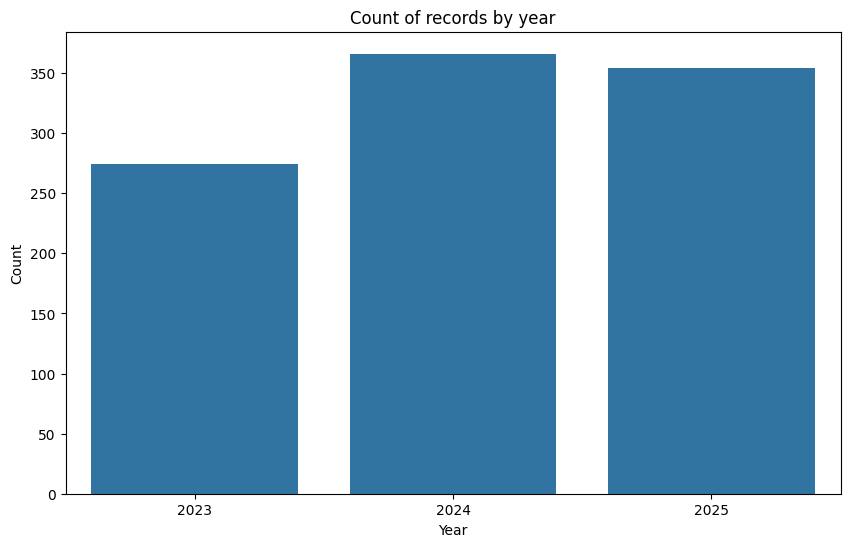

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Count of records by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

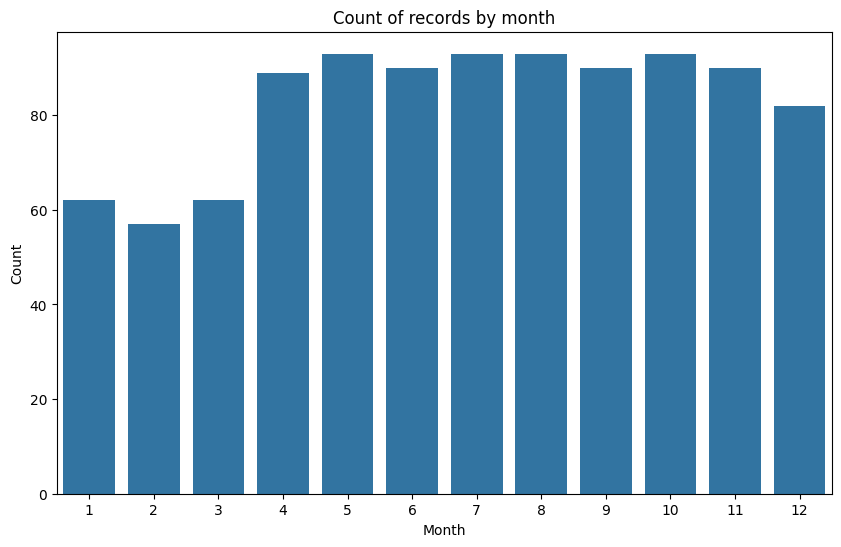

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df)
plt.title('Count of records by month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

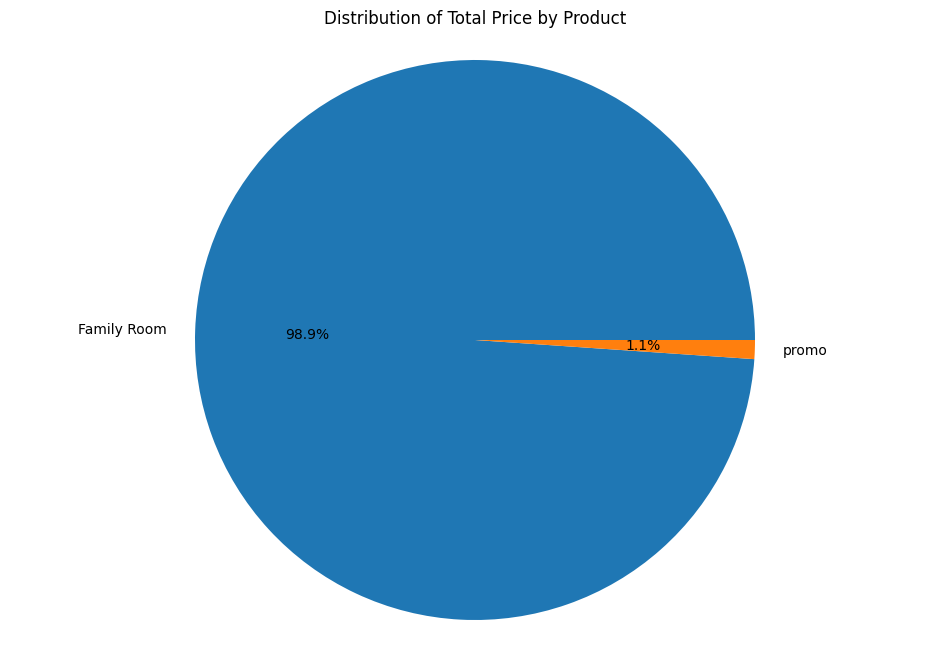

In [48]:
data = df.groupby('name')['price'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.pie(data['price'], labels=data['name'], autopct='%1.1f%%')
plt.title('Distribution of Total Price by Product')
plt.axis('equal')  
plt.show()


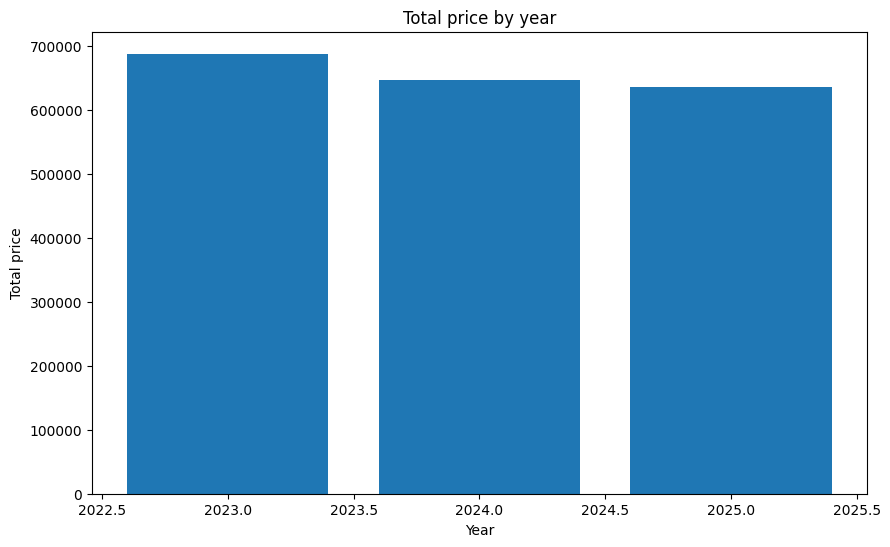

In [44]:
data = df.groupby('year')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(data['year'], data['price'])
plt.title('Total price by year')
plt.xlabel('Year')
plt.ylabel('Total price')
plt.show()

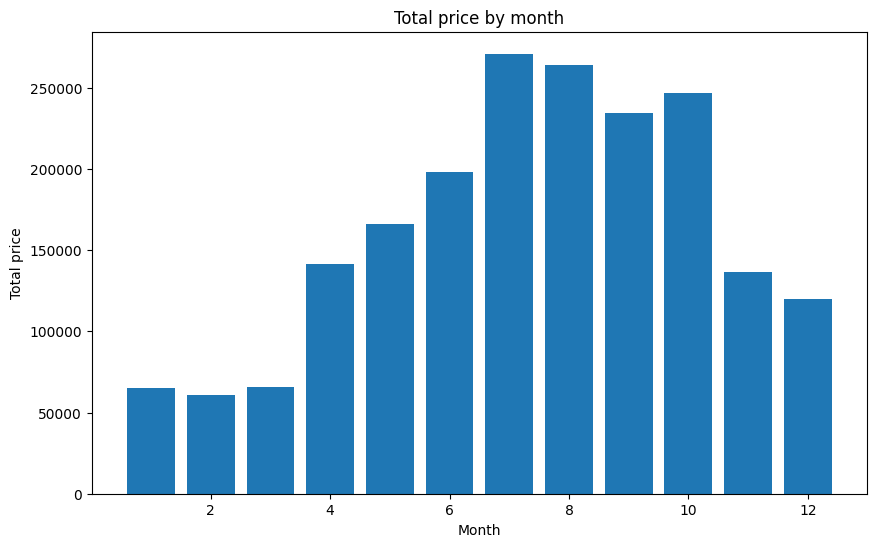

In [45]:
data = df.groupby('month')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(data['month'], data['price'])
plt.title('Total price by month')
plt.xlabel('Month')
plt.ylabel('Total price')
plt.show()

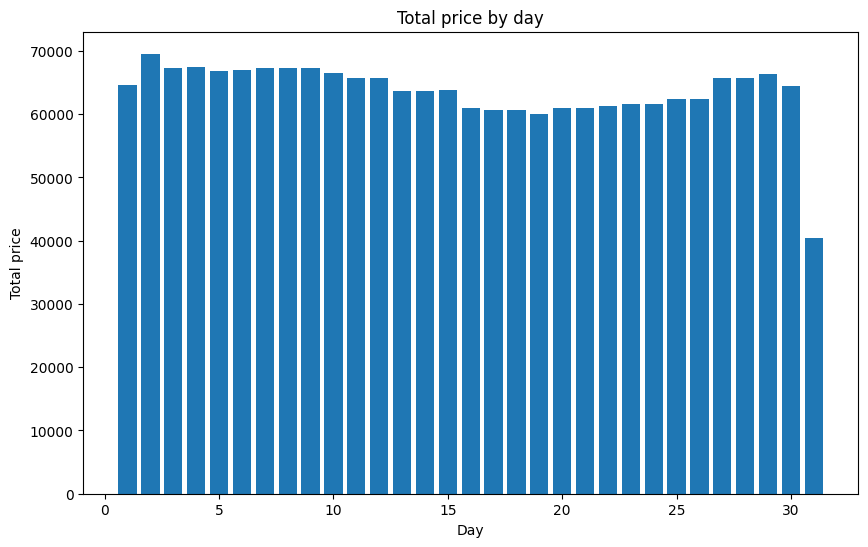

In [46]:
data = df.groupby('day')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(data['day'], data['price'])
plt.title('Total price by day')
plt.xlabel('Day')
plt.ylabel('Total price')
plt.show()

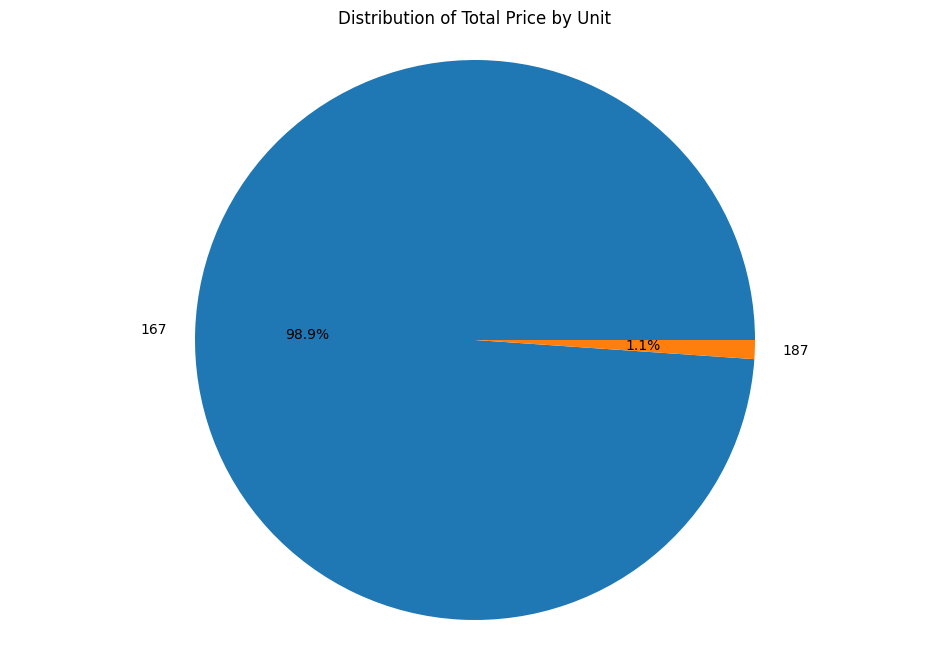

In [49]:
data = df.groupby('unit')['price'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.pie(data['price'], labels=data['unit'], autopct='%1.1f%%')
plt.title('Distribution of Total Price by Unit')
plt.axis('equal')
plt.show()

In [50]:
df['unit'].unique()

array([167, 187], dtype=int64)